# Singular value decomposition (SVD)

Unlike eigendecomposition, SVD is applicable to all matrices.

It's used to decompose a matrix into:
- singular vectors
- singular values

For a matrix $\boldsymbol{A}$ with dimensions $m \times n$, SVD decomposes it into three matrices:
$$\boldsymbol{A} = \boldsymbol{U} \boldsymbol{S} \boldsymbol{V}^T$$

Where:
- $\boldsymbol{U}$ is an orthogonal matrix of left singular vectors ($m \times m$) of $\boldsymbol{A}$
- $\boldsymbol{V}^T$ is an orthogonal matrix of right singular vectors ($n \times n$) of $\boldsymbol{A}$, transposed
- $\boldsymbol{S}$ is a diagonal matrix of singular values of $\boldsymbol{A}$


### SVD with Python

In [11]:
import numpy as np
import torch

In [27]:
A = torch.tensor([[-1, 2], [3, -2], [5, 7]], dtype=torch.float32)
# A = np.array([[-1, 2], [3, -2], [5, 7]])
A

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

In [45]:
U, s, VT = torch.linalg.svd(A)

In [46]:
U

tensor([[ 0.1271,  0.4741,  0.8713],
        [ 0.0016, -0.8785,  0.4778],
        [ 0.9919, -0.0593, -0.1124]])

At this point, $\boldsymbol{S}$ is not in matrix form, rather a vector:

In [47]:
s

tensor([8.6692, 4.1043])

We can convert it into a diagonal matrix using the `torch.diag` function:

In [48]:
S = torch.diag(s)
S

tensor([[8.6692, 0.0000],
        [0.0000, 4.1043]])

In [52]:
S.shape

torch.Size([2, 2])

In [49]:
VT

tensor([[ 0.5580,  0.8298],
        [-0.8298,  0.5580]])

The operation $\boldsymbol{U} \boldsymbol{S} \boldsymbol{V}^T$ cannot be performed directly because the dimensions of $\boldsymbol{U}$ and $\boldsymbol{S}$ do not match. To resolve this, we need to pad the diagonal matrix $\boldsymbol{S}$ with zeros to match the dimensions of $\boldsymbol{U}$ and $\boldsymbol{V}^T$:

In [57]:
S_full = torch.zeros(U.shape[0], VT.shape[0])
S_full[:s.shape[0], :s.shape[0]] = torch.diag(s)

In [60]:
torch.matmul(U, torch.matmul(S_full, VT))

tensor([[-1.0000,  2.0000],
        [ 3.0000, -2.0000],
        [ 5.0000,  7.0000]])

## Data compression with SVD

In [73]:
import matplotlib.pyplot as plt
from PIL import Image

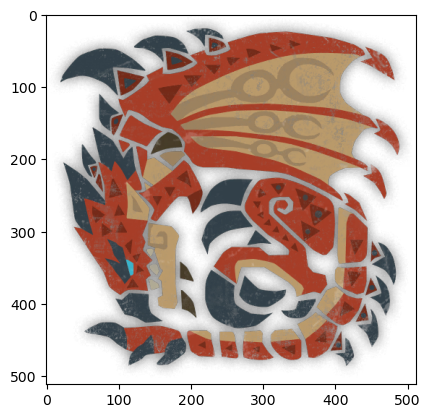

In [74]:
img = Image.open('./img/Rathalos_Icon.webp.png')
_ = plt.imshow(img)

Let's convert the image to grayscale to simplify the SVD process. The grayscale image will have only one channel, while the original image has three channels (RGB).

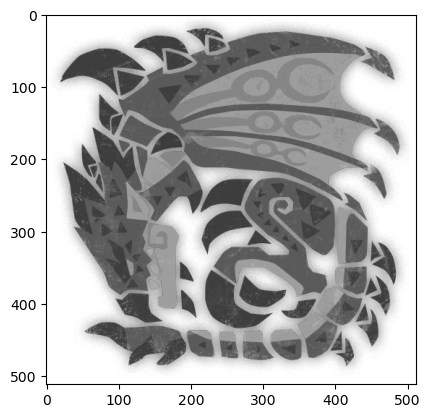

In [76]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

Converting the grayscale image to a numpy matrix:

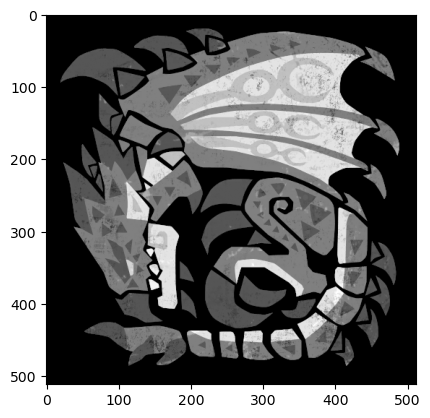

In [77]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

Then calculating the SVD of the image matrix:

In [78]:
U, sigma, V = np.linalg.svd(imgmat)

Eigenvalues are arranged in descending order in $diag(\lambda)$ and so are singular values, in $\boldsymbol{D}$ (in this context, $diag(\sigma)$).

The first left-singular vector of $\boldsymbol{U}$ and the first right-singular vector of $\boldsymbol{V}$ represent the most significant features of the image.

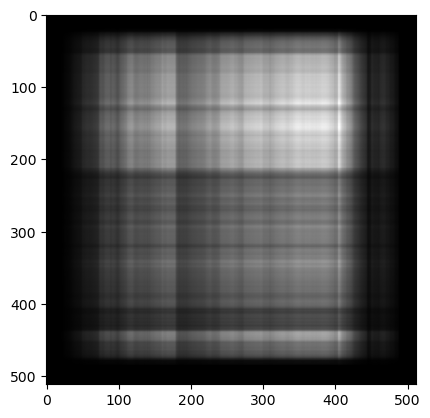

In [79]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

Additional singular vectors improve the image quality:

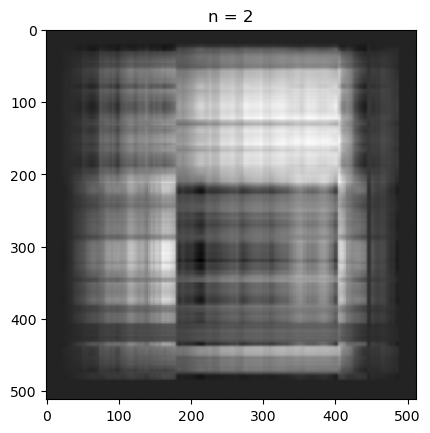

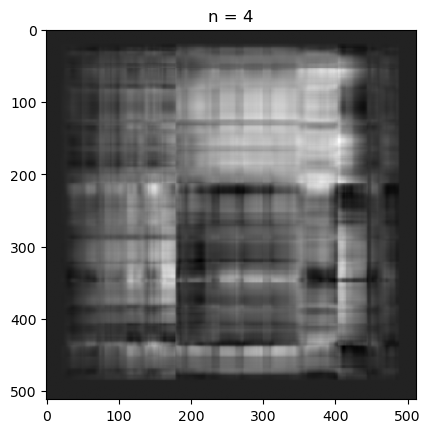

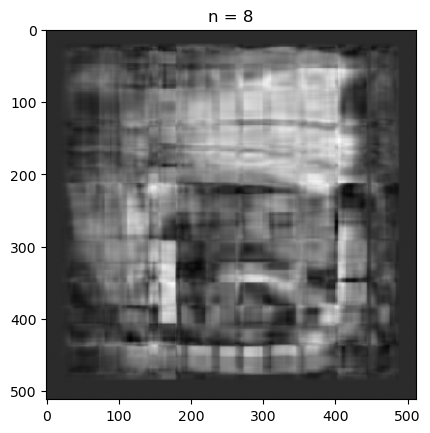

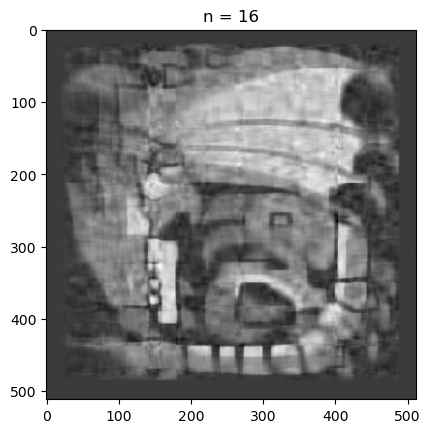

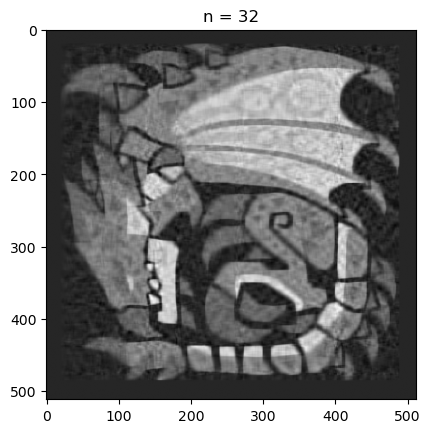

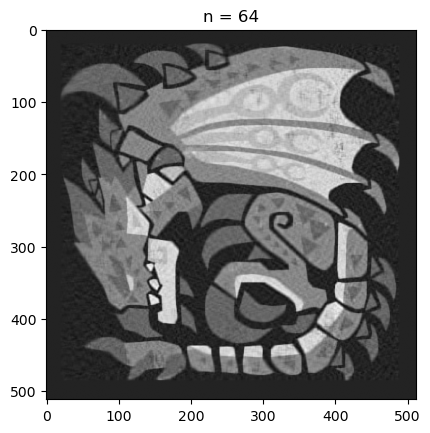

In [80]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

With 64 singular vectors, the image is reconstructed quite well, however the data footprint is much smaller than the original image:

In [85]:
imgmat.shape

(512, 512)

In [86]:
full_representation = 512 * 512
full_representation

262144

In [87]:
svd64_rep = 64 * (512 + 512 + 64)
svd64_rep

69632

In [88]:
svd64_rep / full_representation

0.265625